<a href="https://colab.research.google.com/github/Gaurav1401/Innomatics_Internship_APR_21/blob/main/Recommender_Systems/Recommender_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Relevant Libraries and Connecting with Google Drive :)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


# **Data Loading and its Overview**

For common datasource the path will remain common

In [3]:
songs = np.loadtxt('/content/gdrive/MyDrive/Recommender System/kaggle_songs.txt', delimiter=' ',usecols= (0),  dtype = 'str')
users = np.loadtxt('/content/gdrive/MyDrive/Recommender System/kaggle_users.txt',usecols= (0),  dtype = 'str')
triplet = pd.read_csv('/content/gdrive/MyDrive/Recommender System/kaggle_visible_evaluation_triplets.txt', header = None, delimiter = "\t")
taste_track = pd.read_csv('/content/gdrive/MyDrive/Recommender System/taste_profile_song_to_tracks.txt', header = None, delimiter = "\t", error_bad_lines=False)
unique_tracks = pd.read_csv('/content/gdrive/MyDrive/Recommender System/unique_tracks.txt', header = None, delimiter = '<SEP>')

b'Skipping line 100: expected 2 fields, saw 3\nSkipping line 1366: expected 2 fields, saw 3\nSkipping line 1965: expected 2 fields, saw 3\nSkipping line 2633: expected 2 fields, saw 3\nSkipping line 4604: expected 2 fields, saw 3\nSkipping line 6107: expected 2 fields, saw 3\nSkipping line 6243: expected 2 fields, saw 3\nSkipping line 6977: expected 2 fields, saw 3\nSkipping line 7757: expected 2 fields, saw 3\nSkipping line 8451: expected 2 fields, saw 3\nSkipping line 8507: expected 2 fields, saw 3\nSkipping line 8657: expected 2 fields, saw 3\nSkipping line 9025: expected 2 fields, saw 3\nSkipping line 9360: expected 2 fields, saw 3\nSkipping line 9655: expected 2 fields, saw 3\nSkipping line 9803: expected 2 fields, saw 3\nSkipping line 10390: expected 2 fields, saw 3\nSkipping line 10480: expected 2 fields, saw 3\nSkipping line 11272: expected 2 fields, saw 3\nSkipping line 12554: expected 2 fields, saw 3\nSkipping line 13587: expected 2 fields, saw 3\nSkipping line 13737: expecte

In [4]:
songs = pd.DataFrame(songs, columns=['song_id'])
users = pd.DataFrame(users, columns=['user_id'])

In [5]:
songs.head(5)

,song_id
0,SOAAADD12AB018A9DD
1,SOAAADE12A6D4F80CC
2,SOAAADF12A8C13DF62
3,SOAAADZ12A8C1334FB
4,SOAAAFI12A6D4F9C66


In [6]:
users.head()

,user_id
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d
1,d7083f5e1d50c264277d624340edaaf3dc16095b
2,d68dc6fc25248234590d7668a11e3335534ae4b4
3,9be82340a8b5ef32357fe5af957ccd54736ece95
4,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8


In [7]:
taste_track.columns = ['song_id', 'track_id']
taste_track.head()

,song_id,track_id
0,SOAAADD12AB018A9DD,TRNCENP12903C9EF3A
1,SOAAADE12A6D4F80CC,TRSKKFK128F148B615
2,SOAAADF12A8C13DF62,TRCQMSP128F428A6F7
3,SOAAADZ12A8C1334FB,TRMDNZY128F425A532
4,SOAAAFI12A6D4F9C66,TRZEXLQ128F1491D17


In [8]:
triplet.columns = ['user_id', 'song_id', 'play_count']
triplet.head()

,user_id,song_id,play_count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [9]:
unique_tracks.columns = ['track_id', 'song_id', 'singer', 'song']

In [10]:
unique_tracks.head()

,track_id,song_id,singer,song
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


**After looking at all the datasets, it is better to go with collaborative filtering approach as we are not provided with the features of the music like whether it is a bhakti song or Rock song**

**Checking the number of relevant records**

In [11]:
print('Total number of songs we have in record', songs['song_id'].unique().shape[0])
print('Total number of users we need to focus on', users['user_id'].unique().shape[0])

Total number of songs we have in record 386213
Total number of users we need to focus on 110000


**Checking number of missing values in each column**

In [12]:
print('Number of missing values in triplet dataframe',triplet.isna().sum().sum())
print('Number of missing values in unique_tracks dataframe',unique_tracks.isna().sum().sum())
print('Number of missing values in songs dataframe',songs.isna().sum().sum())
print('Number of missing values in songs dataframe',users.isna().sum().sum())

Number of missing values in triplet dataframe 0
Number of missing values in unique_tracks dataframe 15
Number of missing values in songs dataframe 0
Number of missing values in songs dataframe 0


In [13]:
unique_tracks.isna().sum()

track_id     0
song_id      0
singer       0
song        15
dtype: int64

In [14]:
unique_tracks.dropna(inplace = True) # Removing missing values

In [15]:
df=pd.merge(triplet,unique_tracks,on='song_id')

In [16]:
df.shape

(1491951, 6)

In [17]:
df.to_csv("data_final.csv")

In [18]:
df.head()

,user_id,song_id,play_count,track_id,singer,song
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
2,c5006d9f41f68ccccbf5ee29212b6af494110c5e,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
3,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,SOBONKR12A58A7A7E0,2,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
4,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,SOBONKR12A58A7A7E0,4,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One


In [19]:
df.drop('track_id', axis = 'columns', inplace = True)

In [20]:
sum(df.duplicated()) # Checking total number of duplicate rows in the dataframe

35387

In [21]:
df.drop_duplicates(inplace = True)

In [22]:
df.isna().sum()

user_id       0
song_id       0
play_count    0
singer        0
song          0
dtype: int64

**Checking unique values in each column**

In [23]:
print('Total number of unique user_id', len(df['user_id'].unique()))
print('Total number of unique song_id', len(df['song_id'].unique()))
print('Total number of unique singers', len(df['singer'].unique()))
print('Total number of unique song', len(df['song'].unique()))

Total number of unique user_id 110000
Total number of unique song_id 163205
Total number of unique singers 28366
Total number of unique song 137670


#**Songs Per User Trend**
**Most number of users are listening to around 10 songs only**

In [ ]:
songs_per_user=df.groupby('user_id')['song'].count().sort_values()
songs_per_user.head()

user_id
77282c5601ac2af386c410add50d54c15052c2e8    5
1fd647885923823100cbd298993ce43d181f00c3    5
95eb4da8bfe8cf9c757a2d0e56cef5575302ee16    5
95eed04aa83d06333392308a054ee1a4851d3b3b    5
95f00235219b75e73ec8d9bb06d5f323574faec1    5
Name: song, dtype: int64

**Checking how many songs each user is listening**

In [ ]:
songs_per_user.describe()

count    110000.000000
mean         13.241491
std           8.105048
min           5.000000
25%           7.000000
50%          11.000000
75%          17.000000
max          53.000000
Name: song, dtype: float64

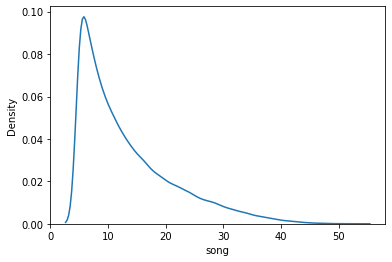

In [ ]:
sns.kdeplot(songs_per_user)
plt.show()

# **Popular singer**

**Most of the songs have a play_count of around 1 only and there are very less songs having larger play_count hence we can conclude that very few singers are actually popular**

In [ ]:
artist_popularity=df.groupby('singer')['play_count'].sum().sort_values()
artist_popularity.head()

singer
Özlem Tekin                1
Open Season                1
Open Your Eyes             1
Opgeduveld                 1
Orange Tulip Conspiracy    1
Name: play_count, dtype: int64

In [ ]:
artist_popularity.tail()

singer
Florence + The Machine    28224
Coldplay                  32135
Björk                     35210
Dwight Yoakam             35688
Kings Of Leon             35857
Name: play_count, dtype: int64

**We can see that 'Kings Of Leon' is the most famous singer**

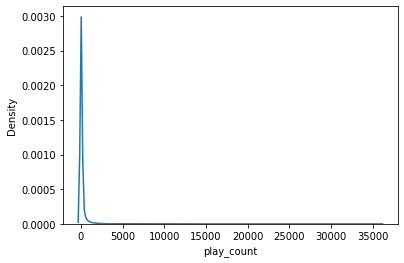

In [ ]:
sns.kdeplot(artist_popularity)

# **Top 10 Singers with most played Songs**
**Kings Of Leon and Dwight Yoakam are actually the most loved singers accoridng to the data**

In [ ]:
singers_10 = pd.DataFrame(df.groupby('singer')['play_count'].sum().sort_values(ascending = False)[:10]).reset_index()

In [ ]:
singers_10['Number of Songs'] = singers_10['singer']

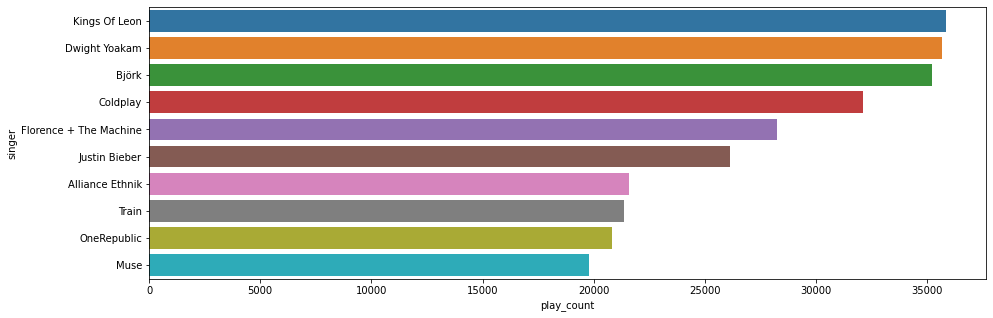

In [ ]:
plt.figure(figsize = (15, 5))
ax = sns.barplot(x = 'play_count', y = 'singer', data = singers_10)

# **Top 10 most played songs**
**You'r the one and Undo are the most listened songs according to the trend shown below**

In [ ]:
songs_10 = pd.DataFrame(df.groupby('song')['play_count'].sum().sort_values(ascending = False)[:10]).reset_index()

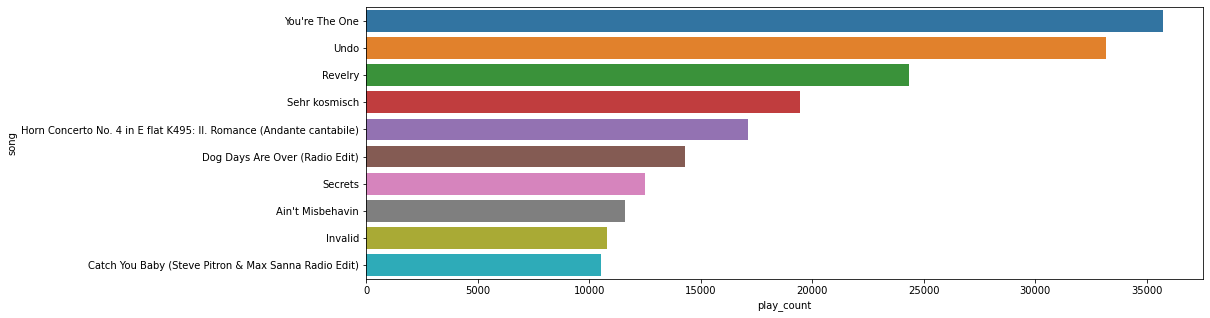

In [ ]:
plt.figure(figsize = (15, 5))
sns.barplot(x = 'play_count', y = 'song', data = songs_10)

#**What made Kings of Leon Famous**

**It looks like Revelry song is the reason why Kings of Leon is so famous**

In [ ]:
kol_songs = df[df['singer'] == 'Kings Of Leon'].groupby('song')['play_count'].sum().sort_values(ascending = False)[:10]

In [ ]:
kol_songs = pd.DataFrame(kol_songs).reset_index()

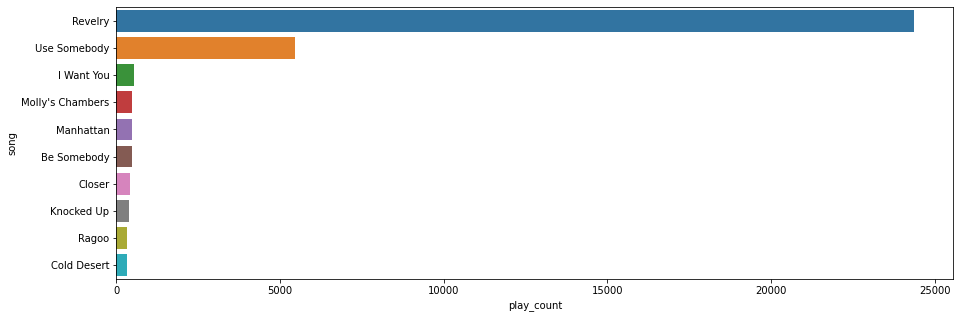

In [ ]:
 plt.figure(figsize = (15, 5))
sns.barplot(x = 'play_count', y = 'song', data = kol_songs)

# **What made Justin Bieber Famous**

**All songs of Justin Bieber have a high play_count and Somebody To Love is his most loved Song**

In [ ]:
 jb_songs = df[df['singer'] == 'Justin Bieber'].groupby('song')['play_count'].sum().sort_values(ascending = False)[:10]

In [ ]:
jb_songs = pd.DataFrame(jb_songs).reset_index()

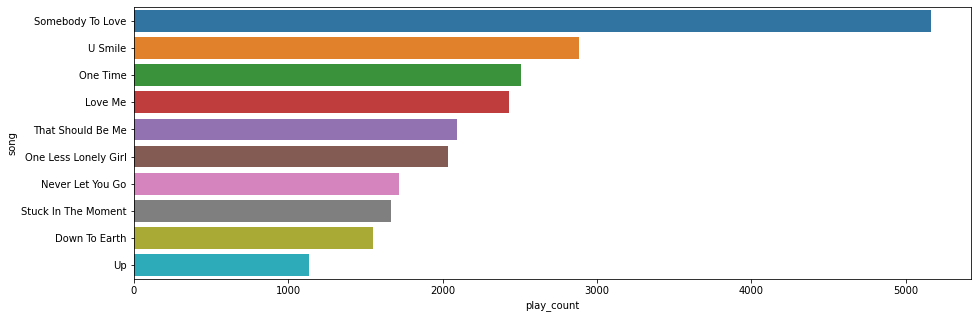

In [ ]:
plt.figure(figsize = (15, 5))
sns.barplot(x = 'play_count', y = 'song', data = jb_songs)

 # **Top 10 Singers by number of Songs**

 **From the given trend it looks like Coldplay has sung most number of Songs according to the data**

In [ ]:
singer_num_songs = df.groupby('singer')['song'].count().sort_values(ascending = False)[:10]

In [ ]:
singer_num_songs = pd.DataFrame(singer_num_songs).reset_index()
singer_num_songs.columns = ['singer', 'No. of Songs']

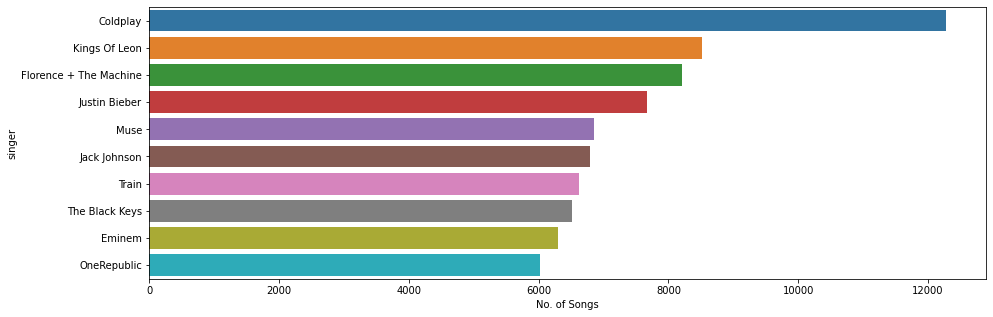

In [ ]:
 plt.figure(figsize = (15, 5))
sns.barplot(x = 'No. of Songs', y = 'singer', data = singer_num_songs)

 # **Top 10 singers with large Fan base**

 **Coldplay has the largest Fanbase as their songs are listened by most number of unique users** 

In [ ]:
fan_base = df.groupby('singer')['user_id'].count().sort_values(ascending = False)[:10]

In [ ]:
fan_base = pd.DataFrame(fan_base).reset_index()
fan_base.columns = ['singer', 'No. of unique users']

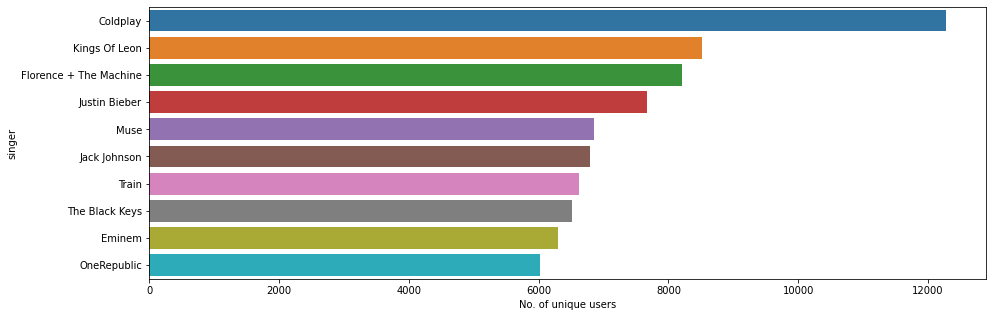

In [ ]:
plt.figure(figsize = (15, 5))
sns.barplot(x = 'No. of unique users', y = 'singer', data = fan_base)

 # **Top 10 Users who are mad for songs**

 **There are many users who have listened to the songs 1000s of times**

In [ ]:
mad_users = df.groupby('user_id')['play_count'].sum().sort_values(ascending = False)[:10]

In [ ]:
mad_users = pd.DataFrame(mad_users).reset_index()
fan_base.columns = ['user_id', 'No. of songs listened']

In [ ]:
mad_users

,user_id,play_count
0,090b841eaf56d343a26625c2c6d08b823927bc4f,1305
1,938c2632d43eeadb8a83a7cc254d014f9cea6afe,1280
2,1c5aa998482a40abfd020759e7d757eb6c510e72,1200
3,c6150292374fb1dad89982367b3245dd5004c718,1192
4,5a9375e46a7e9b869058c7bc0e820e00d77f3e0b,1184
5,d1d845a92cd34456423e781512bdb502ca385b51,1180
6,957440a77858369fb7a6bcc6fa408fc187d5bd7b,1150
7,315103a41c2ced1143de0c2ba20de224800e6d89,1148
8,22bb29714137fa47083963c30e1a26f1bf517e7d,1141
9,bda891a59a96252cc0f5b1f63f2630692b490e37,1140


# **Top 10 Users listening to most number of unique songs**

**There are many users who love to listen many songs**

In [ ]:
tasting_users = df.groupby('user_id')['song'].count().sort_values(ascending = False)[:10]

In [ ]:
tasting_users = pd.DataFrame(tasting_users).reset_index()
tasting_users.columns = ['user_id', 'No. of unique songs listened']

In [ ]:
tasting_users

,user_id,No. of unique songs listened
0,0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90,53
1,03ad93fdb01506ce205f4708decf8e4b1ae90fff,53
2,7d90be8dfdbde170f036ce8a4b915440137cb11c,53
3,016a24e91a72c159a5048ab1b9b2ba5ce761b526,52
4,2e424b28bff1f62a2dae22a918f09f9c30c06d1b,52
5,d30e18323f15426c3cdc8585252ed34459916f51,52
6,316110734d8da7478cc33237458814f770a9eb7a,52
7,992fea335363e87217e1b052fd7380b3fd7e35b4,51
8,7db2077964762a3889dd4d61444a8ba254b6365d,51
9,9769ebffc543fa42b58daf6f52f8816abf5f408e,51


# **Popularity based Recommender Systems**

**It just work similar to the trending page of You Tube by giving same recommendations to every user based on the popularity of the items.**

In [ ]:
#Class for Popularity based Recommender System modelclass 

class popularity_recommender_py():
  def __init__(self):        
    self.train_data = None        
    self.user_id = None        
    self.item_id = None        
    self.popularity_recommendations = None            
  #Create the popularity based recommender system model    
  
  def create(self, train_data, user_id, item_id): 
      self.train_data = train_data
      self.user_id = user_id        
      self.item_id = item_id         
      
      #Get a count of user_ids for each unique song as   recommendation score
      train_data_grouped = train_data.groupby([self.item_id]).agg({self.user_id: 'count'}).reset_index()        
      train_data_grouped.rename(columns = {'user_id': 'score'},inplace=True)            
      #Sort the songs based upon recommendation score
      train_data_sort = train_data_grouped.sort_values(['score', self.item_id], ascending = [0,1])            
      #Generate a recommendation rank based upon score
      train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
      #Get the top 10 recommendations
      self.popularity_recommendations = train_data_sort.head(10)     
      #Use the popularity based recommender system model to    
      #make recommendations    

  def recommend(self, user_id):            
      user_recommendations = self.popularity_recommendations                 
      #Add user_id column for which the recommendations are being generated        
      user_recommendations['user_id'] = user_id            
      #Bring user_id column to the front        
      cols = user_recommendations.columns.tolist()        
      cols = cols[-1:] + cols[:-1]        
      user_recommendations = user_recommendations[cols]
      return user_recommendations

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size = 0.20, random_state=0)

In [ ]:
pm = popularity_recommender_py()
pm.create(train_data, 'user_id', 'song_id')

In [ ]:
#user the popularity model to make some prediction
user_id = input('Enter the User ID: ')

recommend = pm.recommend(user_id)

final = pd.merge(recommend, df.drop_duplicates('song_id'), on = 'song_id', how='left')
# final
# print('Best songs for the given user are: ')
# final[['song', 'Rank']]

final[['Rank', 'song']]

Enter the User ID: fd50c4007b68a3737fe052d5a4f78ce8aa117f3d


,Rank,song
0,1.0,Sehr kosmisch
1,2.0,Undo
2,3.0,You're The One
3,4.0,Dog Days Are Over (Radio Edit)
4,5.0,Revelry
5,6.0,Secrets
6,7.0,Horn Concerto No. 4 in E flat K495: II. Romanc...
7,8.0,Hey_ Soul Sister
8,9.0,Fireflies
9,10.0,Tive Sim


# **COLLABORATIVE FILTERING** <br>

Collaborative filtering filters information by using the interactions and data collected by the system from other users. It's based on the idea that people who agreed in their evaluation of certain items are likely to agree again in the future.

The concept is simple: when we want to find a new movie to watch we'll often ask our friends for recommendations. Naturally, we have greater trust in the recommendations from friends who share tastes similar to our own.

# **Types of Collaborative Filtering**


1.   **Memory-Based or Nearest Neighborhood Algorithm**

This method uses a rating system to predict the preferences of one user by taking into consideration the preferences of a similar user, or the ‘neighbor’. There are two ways to calculate preferences here, 

  a) User-based Collaborative Filtering 

  b) Item-based Collaborative Filtering

2.   **Model-Based Collaborative Filtering**

In this method of collaborative filtering recommender systems, different data mining and machine learning algorithms are used to develop a model to predict a user’s rating of an unrated item.

3.   **Hybrid Collaborative Filtering**

This method combines the memory-based and model-based Collaborative Filtering systems to eliminate limitations like sparsity and loss of information. This method, however, is more complex to build.








## **CREATING MODEL USING USER BASED COLLABORATIVE FILTERING**

**Song's name will be provided as input**

In [24]:
df.head()

,user_id,song_id,play_count,singer,song
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
2,c5006d9f41f68ccccbf5ee29212b6af494110c5e,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
3,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,SOBONKR12A58A7A7E0,2,Dwight Yoakam,You're The One
4,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,SOBONKR12A58A7A7E0,4,Dwight Yoakam,You're The One


**To Calculate the total number of unique users listening to a song and how many times the song is being played**

In [25]:
joint = df.groupby('song').agg({'user_id':'count', 
                              'play_count' : 'sum'})

In [26]:
joint = joint.reset_index()
joint.columns = ['song','user_count', 'total_play_count']

In [27]:
joint.head()

,song,user_count,total_play_count
0,Ef Ég Hefði Aldrei...,1,2
1,Light Mass Prayers,4,5
2,"The Arsonist Story"": Evil Craves Attention/O...",1,1
3,Ég Átti Gráa Æsku,4,34
4,(Jack The Stripper),2,2


**Doing this so that we could filter out the relevant songs having good ratings and fan following to recommend to another user using collaborative filtering**

In [28]:
combined = df.merge(joint, how = 'left', left_on='song', right_on='song')

In [29]:
combined.head()

,user_id,song_id,play_count,singer,song,user_count,total_play_count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One,4270,35738
1,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One,4270,35738
2,c5006d9f41f68ccccbf5ee29212b6af494110c5e,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One,4270,35738
3,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,SOBONKR12A58A7A7E0,2,Dwight Yoakam,You're The One,4270,35738
4,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,SOBONKR12A58A7A7E0,4,Dwight Yoakam,You're The One,4270,35738


In [30]:
combined.drop('singer', axis = 'columns', inplace=True)

**Putting a threshold value for the number of unique users as there are many songs that have a play_count of more than 100s but are only being listened by 3-4 users, so the songs which are liked by very less users are actually not relevant**

In [31]:
combined[combined['user_count'] < 50].shape, combined[combined['user_count'] >= 50].shape

((714415, 6), (742149, 6))

**We are only recommending songs which have play_count of more than or equal to 500.**

In [32]:
combined[combined['total_play_count'] < 500].shape, combined[combined['total_play_count'] >= 500].shape

((1058073, 6), (398491, 6))

In [33]:
combined[(combined['user_count'] <= 50) & (combined['total_play_count'] < 500)].shape

(721098, 6)

**It is better to recommend the songs which have a play count of more than 500 and have been listened by more than 50 users**

In [34]:
final_df = combined[(combined['user_count'] > 50) & (combined['total_play_count'] >= 500)]

In [35]:
final_df["song"].count()

398124

In [36]:
final_df.head()

,user_id,song_id,play_count,song,user_count,total_play_count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,You're The One,4270,35738
1,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,You're The One,4270,35738
2,c5006d9f41f68ccccbf5ee29212b6af494110c5e,SOBONKR12A58A7A7E0,1,You're The One,4270,35738
3,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,SOBONKR12A58A7A7E0,2,You're The One,4270,35738
4,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,SOBONKR12A58A7A7E0,4,You're The One,4270,35738


In [ ]:
final_df.shape

(398124, 6)

**Making the matrix of user_id and songs to further use in collaborative filtering**

In [ ]:
  final_edit=final_df.pivot_table(index='user_id',columns='song',values='play_count').head()

In [ ]:
final_edit.fillna(0,inplace=True) # Filling missing values with 0 as those songs have not been listened by that particular user.

In [ ]:
final_edit.tail()

song,#40,'Till I Collapse,(Nice Dream),(They Long To Be) Close To You,(iii),1234,16 Candles,21 Guns [feat. Green Day & The Cast Of American Idiot] (Album Version),221,3AM (LP Version),5.45,A Beggar On A Beach Of Gold,A Girl Like You,A Nightmare To Remember (Album Version),A Whiter Shade Of Pale,A-Punk (Album),Above The Clouds (Edited),Abrazame,Acapulco 1922,Acende O Candieiro (2003 Digital Remaster),Adam's Song,Addams Groove,Aerodynamic (Daft Punk Remix),Aghia Sophia (2008 Digital Remaster),Ain't Misbehavin,Ain't No Rest For The Wicked (Original Version),Alejandro,Alejate De Mi,Alice,All Along The Watchtower,All Hands Against His Own,All I Do Is Win (feat. T-Pain_ Ludacris_ Snoop Dogg & Rick Ross),All I Ever Wanted,All I Need,All Men Are Liars,All My Life,All My Loving,All Night Long,All Star,All Summer Long (Album Version),...,Working With Homesick,XRDS,Xehasmeni Melodia,Yeah Yeah,Yeah!,Yellin' At The Xmas Tree,Yellow,Yellow Ledbetter,Yes,Yesterday Once More,You,You And Me (Wedding Version),You And Me Jesus,You And Your Heart,You Be The Anchor That Keeps My Feet On The Ground_ I'll Be The Wings That Keep Your Heart In The Clouds (Album),You Belong With Me,You Could Be Mine,You Get What You Give,You Give Love A Bad Name,You Got Me,You Gotta Be,You Know I'm No Good,You Learn (Album Version),You Never Miss The Water Until The Well Runs Dry,You'd Be So Nice To Come Home To,You'll Be In My Heart,You'll Never Know (My Love) (Bovellian 07 Mix),You're Not Alone,You're The One,You've Got The Love,Young,Your Guardian Angel,Your Hand In Mine,Your Mother Should Have Told You,Your Touch,Your Woman,Youth Against Fascism,Zero,paranoid android,re:stacks
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00014a76ed063e1a749171a253bca9d9a0ff1782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00015189668691680bb1a2e58afde1541ec92ced,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00020fcd8b01986a6a85b896ccde6c49f35142ad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0003798d61a8010dbfd8010180b7107cbbb8a649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse import csr_matrix
final_matrix=csr_matrix(final_edit.values)

In [ ]:
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors(n_neighbors=3,
                        radius=1.0,
                         algorithm='brute',
                         leaf_size=30,
                         metric='cosine',
                         metric_params=None,
                        n_jobs=-1)

In [ ]:
model.fit(final_edit)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=3, p=2, radius=1.0)

In [ ]:
def recommend(song):
  position=final_edit.index.get_loc(song)
  distances,indices = model.kneighbors(final_matrix[position,:].reshape(1, -1),n_neighbors=5)
  print('As you are {0}:\nYou will like these songs\n'.format(final_edit.index[position]))
  
  for i in range(1,5):    
    user=final_edit.index[indices.flatten()[i]]
    maax=final_edit[final_edit.index==user].values.max()
    print('{0}: {1}\n'.format(i,final_edit[final_edit.index==user].idxmax(axis=1).values[0]))


recommend("00014a76ed063e1a749171a253bca9d9a0ff1782")

As you are 00014a76ed063e1a749171a253bca9d9a0ff1782:
You will like these songs

1: Speak

2: Sweet home Alabama

3: Easy

4: Dog Days Are Over (Radio Edit)



## **CREATING MODEL USING ITEM BASED COLLABORATIVE FILTERING**

**Item's name will be provided as the input**

In [38]:
user_rating_data=final_df.pivot_table(index='song',columns='user_id',values='play_count')

In [39]:
user_rating_data.fillna(0,inplace=True)

In [ ]:
user_rating_data.tail() # Transpose

user_id,00014a76ed063e1a749171a253bca9d9a0ff1782,00015189668691680bb1a2e58afde1541ec92ced,0001ff7aa2667c8d8b945317b88adaed1c0b9dc2,00020fcd8b01986a6a85b896ccde6c49f35142ad,0003798d61a8010dbfd8010180b7107cbbb8a649,0003d5245414b9c6244046543a06f601bfc97949,00040e91f2f614ca2f94ebc558dd0fc53ea2b875,0004dd6499e2e3f630f070416c437627de60d5c1,0005b81b840251543089e816fb790690e3914df2,00061a993bb3add5cc37b2ea28a9552337f2fe4d,0006a8a3733a7009f8bc109ccb3cdb59a19721ad,0006dfb63a4b7b1790a18c4c92da3b9dbcbc02bb,0007140a3796e901f3190f12e9de6d7548d4ac4a,0007151403610e6b0d8c9c7352b2a72144a212d8,00071b4e8ffb68920638635660f887e8c43a3f36,000724134199acaa98869fc4ffb805198d2940eb,0007ccf17b03de70b8642e2548fe4c9be3b9e560,0007e2fe805dd791cd082707a85cd616e7808ea5,0008c5592e089fff5a99c4bd1ef4c2fc1a7bf2a8,000923be99eda0ecf81ca3351794f80dd758f696,000a05d1543724ff087cea15ede2fe4eb417ae8b,000a43eb37163bb2f93020e107a2d543f27257b7,000ae9c80733348ff64cd3716a27477b94578d9d,000b22f91d4992dba3a80025493059f972a7850e,000b30862af21f64b05bc8b35a1a13577948d34d,000b8aba8fde15a79a947b2fdaacf162726d4630,000d1ab78dfe1ed9201b762370743af08dc53f5b,000dd7137b511a0c6e45880de551c6a7019ee4c3,000f1aea4be1f190c79fcaf0ba158732b210fc0f,000f7987ddcba4eefb4a3f37d78c3347d887a1e7,000ff0be2ddd080905d46d155d2c3821cc127040,0011d5f4fb02ff276763d385c3f2ded2b00ad94a,00129ab0a7e969359aceab8c1db3db3342e17518,001599607ba12f1aa6d6ffe3237e00c4dda0055c,0015c41d2d3fd639bad125cf737039dcc65e1865,0015fa97e2a0ec2eaa252b9d892f8bac269e8c8b,00163db1225a833be3ce50798198a8059a507dae,0017af1a903e9c32db1c3ac11fc6fff3213c2e96,0018e70be70ebbdf1f2ec2dab891d0de0fe25710,001943f33f2b2b713f239c3e9f7f3233594ca4ab,...,ffe7958ffecb733473f495d5c3b3246e7b017522,ffe80dacced7e9dfe98074bab80eb11ef3b785c7,ffe8430dabbe08d48f505ae7e82b04031e9e4ebc,ffe95a4bf0b8178a8b1db270efe20aff5928dbf4,ffe96e24a565e460bac7f144a99b21e6b3ec421d,ffe98099df91d5ff4a9ab02f58bb9dc87b278cb2,ffe98240b89fb05e1997ed4933b544d434f108b1,ffe9b7a91e236149072a1e81a145c6c7eba3b808,ffeaa4970cbecf74e33de158d9eb110774dd9a53,ffeb0748367d0befd5c29e01416f0e79c4dbaa5f,ffec05a25ac8205943d2a4defcaf9aa609d9c63c,ffec588ea1dbc63bbd28f2155a10e03c020468a6,ffec87ea10f29a7103edd660c45c65527b1c4b9d,ffedd3bea08f4ef2c7e5df5821b5e79ef2ca6ae5,ffee87bc67591e8045e05674691672c5207c5e83,ffee916020d891a74264b8326829742333b79103,ffef132931d961bad8df82a6a8f200fa1aed7746,ffef5c05e4f25af2e8e9880af84d66936056b597,ffefed477ce4d09877e5483aac8d7123bec16bb6,fff040562f792c8d1caea35706d39160d0173f13,fff1310e43c6c37962596f528cd73d78aba17d1b,fff16c1f1888c93847d64df3d8446439efe743d5,fff16e33847fcc82338026c3c88293c1af139a8e,fff3b1ee05d9750e8868de9470ea46fcb0776f66,fff4438f5d96c5ecd66678f2a22fd7bbed59625f,fff5304527f3c658ce48cd7afa5b76b7b4172852,fff5f4a02dfb4d4b9f6ab5b728f48e235d99959a,fff6f087923420e4e5d2b0669531b26ae351bab4,fff7d30a45a17d26768d020b75818008a741ef2c,fff7d93d0384f02498bcbaefccd76bee486da8cc,fff7e94f0a8d3c6c705b5f7c677d61da82aa545b,fffa5731da86ec66f113b8eb8dc763c444110692,fffa8a20b865c4d2443785bab08bb498f0795a43,fffcfe9b89b791e39ff3e643aa57ae9303079c56,fffd0a1b26c37a55574d844277d176991d054f99,fffdef71f13352e9cff769f1d96f5ccf90f8955e,fffe29116f96c97b47a5dabdd406784ad0ba6f30,fffe5b73c50c72ca9c54947efac1fcacf59c4a17,fffed0bee753cd78494011b8b55dafd4f5c7e5ff,ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee
song,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Your Woman,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Youth Against Fascism,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
final_matrix=csr_matrix(user_rating_data.values)

In [ ]:
model=NearestNeighbors(n_neighbors=3,
                        radius=1.0,
                         algorithm='brute',
                         leaf_size=30,
                         metric='cosine',
                         metric_params=None,
                        n_jobs=-1)

In [ ]:
model.fit(final_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=3, p=2, radius=1.0)

In [ ]:
def recommend(song):
  
  position=user_rating_data.index.get_loc(song)
  distances,indices = model.kneighbors(final_matrix[position,:].reshape(1, -1),n_neighbors=15)
  print('If you liked {0}:\n Then you will Definetly like these songs too \n'.format(user_rating_data.index[position]))
  for i in range(1,6):    
    print('{0}: {1}\n'.format(i,user_rating_data.index[indices.flatten()[i]]))


recommend("Greece 2000") # Gives similar songs

If you liked Greece 2000:
 Then you will Definetly like these songs too 

1: Let Me Be Myself

2: Citizen/Soldier

3: Bedroom Suite

4: Hero/Heroine

5: Rock Star



# **CREATING MODEL USING CORRELATION**

**Similar items and Users are found using Pearson Correlation Method**

In [ ]:
#user_rating_data=final_df.pivot_table(index='song',columns='user_id',values='play_count')

In [ ]:
#user_rating_data.head()

In [40]:
user_rating_data.fillna(0,inplace=True)

**Swapping the rows and columns of user_rating_data by taking its transpose**

In [41]:
user_rating_data_T = user_rating_data.T

## **Item Based Approach**

**In this approach, similar items are recommended that the user is loving**

In [ ]:
song = user_rating_data_T["I'll Be Your Man"] # Passing the name of the song to find the similar songs

In [ ]:
song_corr = user_rating_data_T.corrwith(song)
song_corr = pd.DataFrame(song_corr, columns=['pearsonR'])
song_corr.dropna(inplace=True)

**Top 5 most similar songs of the given song using Pearson Correlation**

In [ ]:
song_corr.sort_values(by = 'pearsonR',ascending=False).head()

,pearsonR
song,
I'll Be Your Man,1.000000
Esta Es Para Hacerte Féliz,0.089782
Snow [Hey Oh] (Album Version),0.057385
Tighten Up,0.041757
Your Touch,0.039344


## **User Based Approach**
**In this approach, those items are recommended which are being loved by the similar users having similar behaviour**

In [ ]:
user_rating_data_T.head()

song,#40,'Till I Collapse,(Nice Dream),(They Long To Be) Close To You,(iii),1234,16 Candles,21 Guns [feat. Green Day & The Cast Of American Idiot] (Album Version),221,3AM (LP Version),5.45,A Beggar On A Beach Of Gold,A Girl Like You,A Nightmare To Remember (Album Version),A Whiter Shade Of Pale,A-Punk (Album),Above The Clouds (Edited),Abrazame,Acapulco 1922,Acende O Candieiro (2003 Digital Remaster),Adam's Song,Addams Groove,Aerodynamic (Daft Punk Remix),Aghia Sophia (2008 Digital Remaster),Ain't Misbehavin,Ain't No Rest For The Wicked (Original Version),Alejandro,Alejate De Mi,Alice,All Along The Watchtower,All Hands Against His Own,All I Do Is Win (feat. T-Pain_ Ludacris_ Snoop Dogg & Rick Ross),All I Ever Wanted,All I Need,All Men Are Liars,All My Life,All My Loving,All Night Long,All Star,All Summer Long (Album Version),...,Working With Homesick,XRDS,Xehasmeni Melodia,Yeah Yeah,Yeah!,Yellin' At The Xmas Tree,Yellow,Yellow Ledbetter,Yes,Yesterday Once More,You,You And Me (Wedding Version),You And Me Jesus,You And Your Heart,You Be The Anchor That Keeps My Feet On The Ground_ I'll Be The Wings That Keep Your Heart In The Clouds (Album),You Belong With Me,You Could Be Mine,You Get What You Give,You Give Love A Bad Name,You Got Me,You Gotta Be,You Know I'm No Good,You Learn (Album Version),You Never Miss The Water Until The Well Runs Dry,You'd Be So Nice To Come Home To,You'll Be In My Heart,You'll Never Know (My Love) (Bovellian 07 Mix),You're Not Alone,You're The One,You've Got The Love,Young,Your Guardian Angel,Your Hand In Mine,Your Mother Should Have Told You,Your Touch,Your Woman,Youth Against Fascism,Zero,paranoid android,re:stacks
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00014a76ed063e1a749171a253bca9d9a0ff1782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00015189668691680bb1a2e58afde1541ec92ced,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00020fcd8b01986a6a85b896ccde6c49f35142ad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0003798d61a8010dbfd8010180b7107cbbb8a649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def similar_user(user):
  user = user_rating_data[user]# taking the whole data of the particular user
  user_similar = user_rating_data.corrwith(user) # Calculating his/her correrlation with other users
  user_similar = pd.DataFrame(user_similar, columns=['pearsonR']) # Creating the dataframae of those correlation values
  user_similar.dropna(inplace=True)
  top_5 = user_similar.sort_values(by='pearsonR',ascending=False).head().index # Getting the user_id of top 5 highly correlated users
  user_list = list(top_5) # Storing the user_id's into the list
  j=1

  print('Top 5 songs that other most similar users are loving:')
  for i in user_list:
    position=user_rating_data_T.index.get_loc(i) # Getting the location of the user_id's in the user_rating_data_T pivot table
    
    print(j,"----->",user_rating_data_T[user_rating_data_T.index==i].idxmax(axis=1).values[0]) # Getting the most favourite songs of those users


    j+=1

In [ ]:
similar_user('00015189668691680bb1a2e58afde1541ec92ced')

Top 5 songs that other most similar users are loving:
1 -----> Speak
2 -----> For Emma
3 -----> Speak
4 -----> re:stacks
5 -----> For Emma


# **Content Based Filtering**

**It Provides recommendations based on reaction or feedback of the users about the particular item by extracting features from their reviews**

In [42]:
final_df.head()

,user_id,song_id,play_count,song,user_count,total_play_count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,You're The One,4270,35738
1,c34670d9c1718361feb93068a853cead3c95b76a,SOBONKR12A58A7A7E0,1,You're The One,4270,35738
2,c5006d9f41f68ccccbf5ee29212b6af494110c5e,SOBONKR12A58A7A7E0,1,You're The One,4270,35738
3,e4332e11f4df6dd26673bb6b085e9a2bbdc9b8a5,SOBONKR12A58A7A7E0,2,You're The One,4270,35738
4,baf2fe5885ab93fbbdb7fecc6691788e70afb6c8,SOBONKR12A58A7A7E0,4,You're The One,4270,35738


**new is our sample dataset used to test the approach of content based filtering**

In [51]:
new = combined[(combined['user_count'] > 600) & (combined['total_play_count'] >= 20000)]

In [52]:
new.shape

(12425, 6)

In [53]:
new.tail()

,user_id,song_id,play_count,song,user_count,total_play_count
1326804,9255cd855c06bed7535a598e92d37cd01246fe5f,SOJAEYM12A58A7CA33,1,You're The One,4270,35738
1419391,c643865457a0c34773e8325c2b09576d654a7f73,SOIAIGV12A8AE47648,1,You're The One,4270,35738
1439398,632fcb66ae06f4a17308f27b1ca9f57d31dbc5f5,SOVCXRC12AB0182DB5,1,You're The One,4270,35738
1439399,b1bda682567ec5405ed4cc4a804b02dac8557c31,SOVCXRC12AB0182DB5,5,You're The One,4270,35738
1443910,1e6d385e38671ee026f2eb86ce27113b67ea381f,SOGACQO12A8AE4659D,1,You're The One,4270,35738


In [54]:
new['song'].unique()

array(["You're The One", 'Undo', 'Revelry'], dtype=object)

**Converting the names of the songs into numeric values**

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvf = TfidfVectorizer(analyzer='word', stop_words='english')
new["song"]=new["song"].fillna('')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
tvf_matrix=tvf.fit_transform(new["song"].values.astype('U'))

In [57]:
tvf_matrix.shape

(12425, 2)

In [58]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities=cosine_similarity(tvf_matrix)

In [59]:
cosine_similarities

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
indices = pd.Series(new.index, index=new['song']).drop_duplicates()

In [64]:
def get_recommendations(title, cosine_sim=cosine_similarities):
    # Get the index of the movie that matches the title
    
    posi=indices.index.get_loc("You're The One")
    lst_index=[]
    for i in range(0,len(posi)):
      if posi[i]==True:
        lst_index.append(i)

    new_new=pd.DataFrame(cosine_similarities).drop(lst_index,axis=1)
    new_new=pd.DataFrame(cosine_similarities).drop(lst_index,axis=0)


    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(new_new[lst_index[0]]))
        
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:10]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return new['song'].iloc[movie_indices]

In [65]:
print(get_recommendations("Undo"))

1    You're The One
2    You're The One
3    You're The One
4    You're The One
5    You're The One
6    You're The One
7    You're The One
8    You're The One
9    You're The One
Name: song, dtype: object


**Here, I am trying to show the implementation of content based filtering although the data is not made according to that**

# **Collaborative Filtering Using Surprise Library**

In [ ]:
!pip install surprise
import surprise
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.model_selection import cross_validate

     |████████████████████████████████| 11.8MB 18.8MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617686 sha256=90d7bfbf56a7c6bc5ebe16f68d78f3d2a3a8af75dd2f8b1da53347c2c7c01f40
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
import surprise
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import cross_validate
#from surprise import SVD
from surprise import Reader ,NormalPredictor
from surprise import Dataset

In [ ]:
model=KNNWithMeans(k=40)
#algo = SVD()

In [ ]:
reader = Reader(rating_scale=(400,582)) # Since, we want to recommend good songs so the play_count should be more than 400

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(final_df[['user_id', 'song_id', 'user_count']], reader)

# We can now use this dataset as we please, e.g. calling cross_validate
cross_validate(NormalPredictor(), data, measures=['RMSE', 'MAE'], cv=2)

{'fit_time': (0.35726046562194824, 0.48223376274108887),
 'test_mae': array([646.56277   , 642.92580867]),
 'test_rmse': array([1125.28735999, 1118.93941951]),
 'test_time': (1.6346290111541748, 1.9231274127960205)}

In [ ]:
data = Dataset.load_from_df(final_df[['user_id', 'song', 'play_count']], reader)
trainset = data.build_full_trainset()

In [ ]:
type(trainset)

surprise.trainset.Trainset

In [ ]:
from surprise import KNNBasic
similarity_matrix = KNNBasic(sim_options={
        'name': 'cosine', # cosine similarity to find the similar songs
        'user_based': False
        })\
        .fit(trainset)\
        .compute_similarities()

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
print(similarity_matrix)

[[1.         0.37933288 0.41194585 ... 0.32003079 0.40715979 0.80677222]
 [0.37933288 1.         0.31317396 ... 0.18834884 0.78954203 0.9486833 ]
 [0.41194585 0.31317396 1.         ... 0.31481855 0.63245553 0.89442719]
 ...
 [0.32003079 0.18834884 0.31481855 ... 1.         0.         0.        ]
 [0.40715979 0.78954203 0.63245553 ... 0.         1.         0.        ]
 [0.80677222 0.9486833  0.89442719 ... 0.         0.         1.        ]]


In [ ]:
import heapq

In [ ]:
test_subject_iid = trainset.to_inner_uid("00014a76ed063e1a749171a253bca9d9a0ff1782")

In [ ]:
test_subject_iid

75941

In [ ]:
trainset.ur[45165] # getting index of the song in the random dataframe and actual play_count for that song

[(111, 1.0),
 (148, 1.0),
 (283, 90.0),
 (409, 1.0),
 (474, 463.0),
 (537, 1.0),
 (585, 68.0),
 (720, 1.0),
 (507, 1.0),
 (1131, 16.0),
 (786, 1.0),
 (305, 1.0)]

In [ ]:
test_subject_ratings = trainset.ur[test_subject_iid]
k_neighbors = heapq.nlargest(10, test_subject_ratings, key=lambda t: t[1]) 

In [ ]:
test_subject_ratings

[(547, 4.0), (867, 1.0), (1062, 1.0)]

In [ ]:
k_neighbors

[(547, 4.0), (867, 1.0), (1062, 1.0)]

In [ ]:
random=pd.DataFrame(similarity_matrix,columns=final_df["song"].unique(),index=final_df["song"].unique())

In [ ]:
random.head()

,You're The One,Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile),Tive Sim,Catch You Baby (Steve Pitron & Max Sanna Radio Edit),El Cuatrero,Unite (2009 Digital Remaster),Lift Me Up,Open Your Eyes,Rain,Sehr kosmisch,Dog Days Are Over (Radio Edit),Oxford Comma (Album),The Downfall Of Us All,Have Faith In Me,Kryptonite,In The Waiting Line,Transparency,Hips Don't Lie (featuring Wyclef Jean),Hips Don't Lie,Undo,Creep (Explicit),Ain't Misbehavin,In The End (Album Version),Secrets,Boys Will Be Boys,Forever & Always,Replay,Naturally,Yellow,Easy,Bette Davis Eyes,Invalid,Revelry,Electric Avenue,Interactive Halloween Bear,Hotel California,Black,Wait And Bleed (Album Version),Elephant Gun,Float On,...,Pocket Porn (1990),Dear God (Album Version),Breaking The Habit (Album Version),Superstar Talking Blues,Drunk Kid Catholic,Talk Me Out Of Tampa,Tears In Heaven,Loba,Working With Homesick,Secret Hell,In League With Satan,Cold Blooded (Acid Cleanse),Theme From Harry's Game,Glad All Over,Bewildered,Esisti Tu,The Calculation (Album Version),Playground Love,Please_ Before I Go,Servant in heaven - King in hell,Automotywacja,One More Step To Take,Hope,It's Not Over,No Balanço Da Canoa,I'm Your Boogie Man,Animal,Pills,Beautiful Stranger,Gestern_Morgen,Chelsea Burns (Live In Reykjavik 2008),Long Arm Of The Law,Reign Of The Tyrants,Escape,Path,Strip My Mind (Album Version),Train,Ona Kasuita,Kissin' Ears [feat. The-Dream] (Explicit Album Version),Jetstream
You're The One,1.000000,0.379333,0.411946,0.473244,0.500028,0.317210,0.490964,0.552899,0.576352,0.335578,0.492851,0.208458,0.755257,0.717312,0.392348,0.653706,0.341140,0.133824,0.133824,0.454467,0.396780,0.535677,0.597084,0.349182,0.881176,0.392402,0.431100,0.203377,0.271593,0.451223,0.405148,0.529226,0.468116,0.500894,0.460157,0.161061,0.682712,0.570429,0.989541,0.512861,...,0.233331,0.377131,0.205668,0.197606,0.992209,0.720577,0.299709,0.710819,0.386439,0.412364,0.906183,0.623615,1.000000,0.925820,0.166964,0.528227,0.751217,0.789352,0.000000,0.617213,0.663506,0.662056,0.989135,0.33559,0.179821,0.989949,0.853123,0.521387,0.541662,0.557918,0.194522,0.730099,0.265334,0.444545,1.000000,0.8,0.933626,0.320031,0.407160,0.806772
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile),0.379333,1.000000,0.313174,0.479554,0.753188,0.279222,0.976571,0.791495,0.218728,0.331808,0.368867,0.946457,0.372891,0.896117,0.287661,0.000000,0.509985,0.320727,0.320727,0.363510,0.653525,0.491403,0.485195,0.554784,0.621706,0.493127,0.528170,0.885244,0.601118,0.221244,1.000000,0.557168,0.452737,0.885610,0.596437,0.699609,0.461991,0.415571,1.000000,0.745769,...,0.605321,0.347524,0.685727,0.662733,0.000000,0.881689,0.389249,0.715271,0.707107,0.313950,0.857493,0.976187,0.000000,1.000000,0.701706,0.968278,1.000000,0.000000,0.974058,0.943701,0.738827,0.439588,0.707107,0.00000,0.986950,1.000000,0.672673,0.757216,0.000000,0.992052,0.858906,0.390272,0.826957,0.331351,0.981044,1.0,0.876990,0.188349,0.789542,0.948683
Tive Sim,0.411946,0.313174,1.000000,0.429277,0.527726,0.281168,0.697863,1.000000,0.170582,0.453674,0.479853,0.646231,0.910182,0.989949,0.294128,0.914659,0.480491,0.526853,0.527091,0.487149,0.652700,0.348474,0.414803,0.386856,0.442789,0.574090,0.716055,0.882063,0.556588,0.286026,0.949024,0.270820,0.248787,0.228688,0.404923,0.234126,0.594984,0.795495,0.351957,0.707245,...,0.841058,0.000000,0.949020,0.627646,0.992278,0.594993,0.843089,0.895087,1.000000,0.811789,0.608834,0.000000,0.983141,0.961524,0.762001,0.368939,1.000000,0.984252,0.195625,0.857493,1.000000,1.000000,0.593907,1.00000,0.480148,0.948683,0.948683,0.911685,0.671122,0.647336,0.304886,0.966119,0.456127,0.650791,0.857493,0.0,0.987997,0.314819,0.632456,0.894427
Catch You Baby (Steve Pitron & Max Sanna Radio Edit),0.473244,0.479554,0.429277,1.000000,0.222152,0.652178,0.985736,1.000000,0.782624,0.405449,0.194303,0.632695,0.816497,1.000000,0.348809,0.109939,0.782824,0.222371,0.222371,0.503874,0.923715,0.343196,0.277059,0.324652,0.358101,0.40

In [ ]:
lst=random.index.values.tolist()

In [ ]:
j=1
for itemID, views in k_neighbors:
  print("For Song---->",lst[itemID])
  j+=1
  try:
    for i in range(3):
      print(random.iloc[itemID,:].nlargest(3).index[i]) # to find the 3 most matching songs of given song
  except:
      continue

  if(j==5):
    break

FOr Song----> The Gift
Lift Me Up
In The Waiting Line
Forever & Always
FOr Song----> Casting A Spell (Remixed) (1998 Digital Remaster)
El Cuatrero
Unite (2009 Digital Remaster)
Dog Days Are Over (Radio Edit)
FOr Song----> Give It To Me
Unite (2009 Digital Remaster)
Lift Me Up
Rain


In [ ]:
similarity_matrix

array([[1.        , 0.37933288, 0.41194585, ..., 0.32003079, 0.40715979,
        0.80677222],
       [0.37933288, 1.        , 0.31317396, ..., 0.18834884, 0.78954203,
        0.9486833 ],
       [0.41194585, 0.31317396, 1.        , ..., 0.31481855, 0.63245553,
        0.89442719],
       ...,
       [0.32003079, 0.18834884, 0.31481855, ..., 1.        , 0.        ,
        0.        ],
       [0.40715979, 0.78954203, 0.63245553, ..., 0.        , 1.        ,
        0.        ],
       [0.80677222, 0.9486833 , 0.89442719, ..., 0.        , 0.        ,
        1.        ]])

# **Future Scope**

We have applied several filtering techniques for our recommendation system which includes:




*   Popularity Based Filtering
*   Content based Filtering (not enough RAM)
*   Collaborative Based filtering
     - Using Correlation
     - Using Nearest neighbours
     - Using Surprise

But our current recommendation model cannot recommend relevant products to a new user in a personalized manner ,i.e., it suffers from Cold Start Problem.

So to make sure it doesn't happen, it can be prevented by hybrid filtering which is actually a mixture of both content based and collaborative based filtering.

Collaborative filtering using surprise library should further be improved as the RMSE score is 1125.28

We can also try to implement collaborative filtering approach using Turicreate


# **Conclusion**




*   It is better to have a combination of different approaches for a recommender systems having popularity based, content based and collaborative based filtering as each of the approach has its own drawback hence they can't be applied individually.

*  Popularity based recommender systems are not personalized at all as they recommend the same songs for all kind of users.
*   Content based recommender systems require high computational power as compared to collaborative filtering.

   



